In [25]:
import struct
import numpy as np
import tensorflow as tf

path = 'data/'

def load_mnist_images(file_path):
    with open(file_path, 'rb') as f:
        # Read the magic number and metadata
        magic, num_images, rows, cols = struct.unpack('>IIII', f.read(16))
        if magic != 2051:  # Magic number for image files
            raise ValueError(f"Invalid magic number {magic} in file: {file_path}")
        
        # Read image data and reshape
        image_data = np.frombuffer(f.read(), dtype=np.uint8)
        images = image_data.reshape((num_images, rows, cols))
        return images / 255.0  # Normalize pixel values to [0, 1]

def load_mnist_labels(file_path):
    with open(file_path, 'rb') as f:
        # Read the magic number and metadata
        magic, num_labels = struct.unpack('>II', f.read(8))
        if magic != 2049:  # Magic number for label files
            raise ValueError(f"Invalid magic number {magic} in file: {file_path}")
        
        # Read label data
        labels = np.frombuffer(f.read(), dtype=np.uint8)
        return labels

train_images = load_mnist_images(path + 'train-images.idx3-ubyte')
test_images = load_mnist_images(path + 't10k-images.idx3-ubyte')

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

x_train = train_images.reshape(-1, 28*28)
x_test = test_images.reshape(-1, 28*28)

# Autoencoder architecture
encoding_dim = 32  # Size of encoded representation
input_img = tf.keras.layers.Input(shape=(784,))
encoded = tf.keras.layers.Dense(encoding_dim, activation='relu')(input_img)
decoded = tf.keras.layers.Dense(784, activation='sigmoid')(encoded)

# Build autoencoder
encoder = tf.keras.models.Model(input_img, encoded)
autoencoder = tf.keras.models.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train autoencoder
autoencoder.fit(x_train, x_train, epochs=10, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

# Encode and decode some images
encoded_imgs = autoencoder.predict(x_test)

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3791 - val_loss: 0.1890
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1797 - val_loss: 0.1535
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1489 - val_loss: 0.1334
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1311 - val_loss: 0.1209
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1197 - val_loss: 0.1126
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1123 - val_loss: 0.1068
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1069 - val_loss: 0.1024
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1027 - val_loss: 0.0992
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1000 - val_loss: 0.0970
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0978 - val_loss: 0.0954
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 303us/step


In [31]:
# Define the encoder model
encoder = tf.keras.models.Model(input_img, encoded)

# Define the decoder model
encoded_input = tf.keras.layers.Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]  # Get the decoder layer
decoder = tf.keras.models.Model(encoded_input, decoder_layer(encoded_input))

In [32]:
# Encode an image
encoded_img = encoder.predict(x_test[:1])  # Encode the first test image
print("Encoded representation (64 values):")
print(encoded_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Encoded representation (64 values):
[[ 6.9727006 11.800576   1.3285556 16.09754    9.7290325  5.141356
   6.682016   2.7097979  5.077638   2.7211545  2.291599   9.75425
   4.170344   2.3418667  2.3490891  6.9553285  5.163806  11.448501
   6.129701   6.981248  10.052975   5.877669   9.560576   6.211329
   3.0229967  5.308337   4.47655    7.4042983  7.6235247  3.3077126
   6.4036555  1.759352 ]]


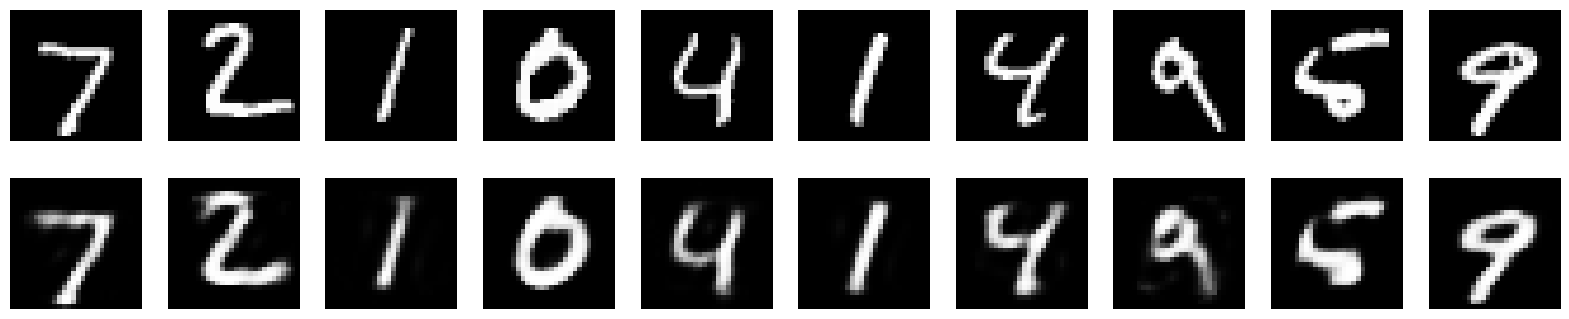

In [27]:
# Display original and reconstructed images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    
    # Reconstructed
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()
